
Accuracy over 30 epochs:

#1 Accuracy: 93.68% Training: 24.38s Testing: 3.20s
 Total Includes: 92979
#2 Accuracy: 94.93% Training: 16.94s Testing: 5.46s
 Total Includes: 108514
#3 Accuracy: 95.23% Training: 14.31s Testing: 3.10s
 Total Includes: 119293
#4 Accuracy: 95.58% Training: 13.37s Testing: 3.14s
 Total Includes: 124335
#5 Accuracy: 95.87% Training: 13.02s Testing: 3.26s
 Total Includes: 133758
#6 Accuracy: 96.19% Training: 12.40s Testing: 3.14s
 Total Includes: 138700
#7 Accuracy: 96.24% Training: 11.98s Testing: 3.39s
 Total Includes: 144054
#8 Accuracy: 96.19% Training: 11.56s Testing: 3.74s
 Total Includes: 150930
#9 Accuracy: 96.49% Training: 11.36s Testing: 3.03s
 Total Includes: 153566
#10 Accuracy: 96.55% Training: 11.12s Testing: 3.10s
 Total Includes: 154542
#11 Accuracy: 96.56% Training: 10.78s Testing: 3.06s
 Total Includes: 159140
#12 Accuracy: 96.75% Training: 10.56s Testing: 3.06s
 Total Includes: 161644
#13 Accuracy: 96.63% Training: 10.43s Testing: 2.99s
 Total

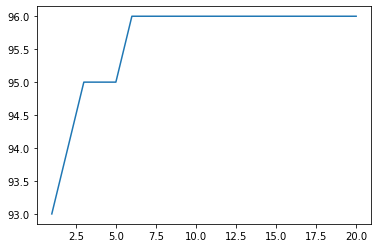

In [8]:
# FOR THE MAXIMUM POSSIBLE CLAUSES NUMBER 329 ON THE MCTM
import matplotlib.pyplot as plt
from pyTsetlinMachine.tm import MultiClassTsetlinMachine
import numpy as np
from time import time
import matplotlib.pyplot as plt
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = np.where(X_train.reshape((X_train.shape[0], 28*28)) > 75, 1, 0)
X_test = np.where(X_test.reshape((X_test.shape[0], 28*28)) > 75, 1, 0)

clauses=1000
s=7.5
T=20
epochs=20

tm = MultiClassTsetlinMachine(clauses, T, s)
acc = np.zeros(epochs, dtype=int)
epoch = np.zeros(epochs, dtype=int)

print("\nAccuracy over 30 epochs:\n")
for i in range(epochs):
    start_training = time()
    tm.fit(X_train, Y_train, epochs=1, incremental=True)
    stop_training = time()

    start_testing = time()
    result = 100*(tm.predict(X_test) == Y_test).mean()
    stop_testing = time()

    print("#%d Accuracy: %.2f%% Training: %.2fs Testing: %.2fs" %
          (i+1, result, stop_training-start_training, stop_testing-start_testing))
    acc[i] = result
    epoch[i] = i+1

    clause_wise_includes_temp = np.zeros(clauses, dtype=int)

    class_wise_includes = np.zeros(10, dtype=int)
    clause_wise_includes = [[0]*clauses]*10

    test = np.zeros(1568)

    for k in range(10):
        for j in range(clauses):
            for n in range(1568):
                test[n] = tm.ta_action(k, j, n)
            clause_wise_includes_temp[j] = test.sum()
        class_wise_includes[k] = clause_wise_includes_temp.sum()
        clause_wise_includes[k] = clause_wise_includes_temp

    print(" Total Includes:",
          ((class_wise_includes.sum())))


plt.plot(epoch, acc)
